In [4]:
import numpy as np 
import scipy as sp 
import pandas as pd 
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option('display.notebook_repr_html', True)

from datetime import date, datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})  

from cryptocompare import get_daily_trades
from indicators import *

import requests

import plot

Its been a tough Q3 for the cryptocurrency market. Bitcoin has defended the 6k price level 3 times already and is in the process of defending it a 4th, with prices hovering right off of this key level at around \$6,250. In each attempt to defend $6k bitcoin has rallied to disappointingly lower highs, first getting stuffed at 12k then 10k then 8k. Hmm I wonder where the next local max will be found? If the pattern continues its not looking good for bitcoin let alone the rest of the market. 

Altcoins have really taken a beating during this latter half of the year and its getting worse as I write this. While bitcoin attempts to stay above its year to date low, altcoins just keep setting new lows. Lets look at the top 50 cryptocurrencies to see how they are doing.


In [5]:
cmc_url = 'https://api.coinmarketcap.com/v2/ticker/'
cmc_tickers = requests.get(cmc_url).json()['data'].values()
top_50_assets = sorted([t for t in cmc_tickers if t['rank'] <= 50], key=lambda t: t['rank'])

First we fetch open high low close and volume data from cryptocompare.com:

In [6]:
ohlcv = {}
for asset in top_50_assets:
    asset['symbol'] = 'IOTA' if asset['name'] == 'IOTA' else asset['symbol']
    ohlcv[asset['symbol']] = get_daily_trades(asset['symbol'])

We'll want to put all the closing prices into one data frame so we can look at them together.

In [7]:
prices = pd.DataFrame()
for asset in ohlcv:
    prices[asset] = ohlcv[asset].close

Let's just focus on prices from 2018:

In [5]:
prices_ytd = prices[datetime(2018,1,1):]
price_desc = prices_ytd.describe().T
price_desc['current_price'] = prices_ytd.tail(1).T
price_desc['pct_off_high'] = (price_desc.current_price - price_desc['max']) / price_desc['max']
price_desc['above_min'] = price_desc['min'] < price_desc['current_price']
print('On average each market is down {}% from YTD high, with only {}% above their YTD minimum.'.format(
    round(price_desc.pct_off_high.mean(),2), 100*price_desc.above_min.sum()/price_desc.shape[0]))
price_desc

On average each market is down -0.8% from YTD high, with only 100.0% above their YTD minimum.


,count,mean,std,min,25%,50%,75%,max,current_price,pct_off_high,above_min
BTC,239.0,8577.021255,2231.771331,5871.280000,6802.975000,8152.200000,9392.425000,17172.30000,6746.990000,-0.607100,True
ETH,239.0,639.066736,247.155830,270.370000,457.105000,579.010000,812.395000,1385.02000,276.950000,-0.800039,True
XRP,239.0,0.780036,0.467510,0.273000,0.481450,0.657300,0.898350,2.78000,0.326600,-0.882518,True
BCH,239.0,1114.820084,488.880997,510.260000,750.305000,996.480000,1315.970000,2856.93000,529.060000,-0.814815,True
EOS,239.0,9.554519,3.540432,4.510000,7.000000,8.630000,11.750000,21.41000,5.170000,-0.758524,True
XLM,239.0,0.324533,0.125979,0.177500,0.225450,0.293500,0.382650,0.88480,0.217800,-0.753843,True
LTC,239.0,136.347197,53.548499,53.400000,85.195000,132.630000,168.970000,278.92000,57.390000,-0.794242,True
USDT,239.0,1.002089,0.013885,0.979300,0.999150,1.000000,1.000000,1.12000,0.997500,-0.109375,True
ADA,239.0,0.282385,0.205313,0.089640,0.152500,0.207900,0.331000,1.15000,0.096550,-0.916043,True
IOTA,77.0,1.097623,0.106165,0.934700,1.010000,1.070000,1.180000,1.34000,1.070000,-0.201493,True


In [6]:
price_desc.pct_off_high.mean()

-0.7967749447856178

Let's look at those markets that are not in the process of setting new lows:

In [69]:
resilient = price_desc[price_desc.above_min].sort_values('pct_off_high', ascending=False)
resilient

,count,mean,std,min,25%,50%,75%,max,current_price,pct_off_high,above_min
USDT,226.0,1.002258,0.014258,0.97930,0.999125,1.000000,1.000000,1.1200,1.0000,-0.107143,True
MOAC,226.0,2.140398,0.791926,1.11000,1.460000,1.930000,2.600000,4.3200,3.6000,-0.166667,True
IOTA,64.0,1.109364,0.112748,0.93470,NaN,NaN,NaN,1.3400,0.9464,-0.293731,True
BNB,226.0,12.820487,2.691923,6.70000,11.077500,12.975000,14.255000,22.7400,9.1800,-0.596306,True
BTC,226.0,8694.592699,2238.875843,5871.28000,6987.320000,8217.240000,9593.792500,17172.3000,5958.7500,-0.653002,True
ZRX,226.0,1.086260,0.401347,0.44420,0.820400,1.000000,1.290000,2.3300,0.6890,-0.704292,True
XLM,226.0,0.330569,0.126934,0.17750,0.230450,0.298350,0.386350,0.8848,0.2059,-0.767292,True
DGB,226.0,0.039094,0.019565,0.01716,0.027393,0.034915,0.043307,0.1264,0.0214,-0.830696,True
WAVES,226.0,5.710088,2.942726,1.78000,3.545000,5.065000,7.147500,14.0500,2.0000,-0.857651,True
BTM,226.0,0.790795,0.736561,0.09265,0.341375,0.565150,0.860800,3.3800,0.1022,-0.969763,True


Let's look at the correlations between these assets:

In [338]:
def corr_plot(df, annot=True):
    corr = df.reset_index().corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(20, 20))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=annot)
    
    plt.show()

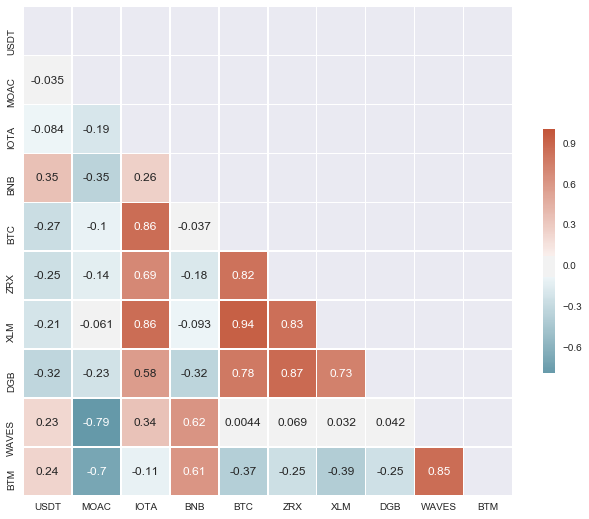

In [70]:
corr_plot(prices[resilient.index].dropna())

It's interesting to see that these prices are not tremendously correlated. IOTA, DGB, XLM, ZRX are all very correlated to bitcoin while WAVES, BTM, BNB and MOAC are not. 

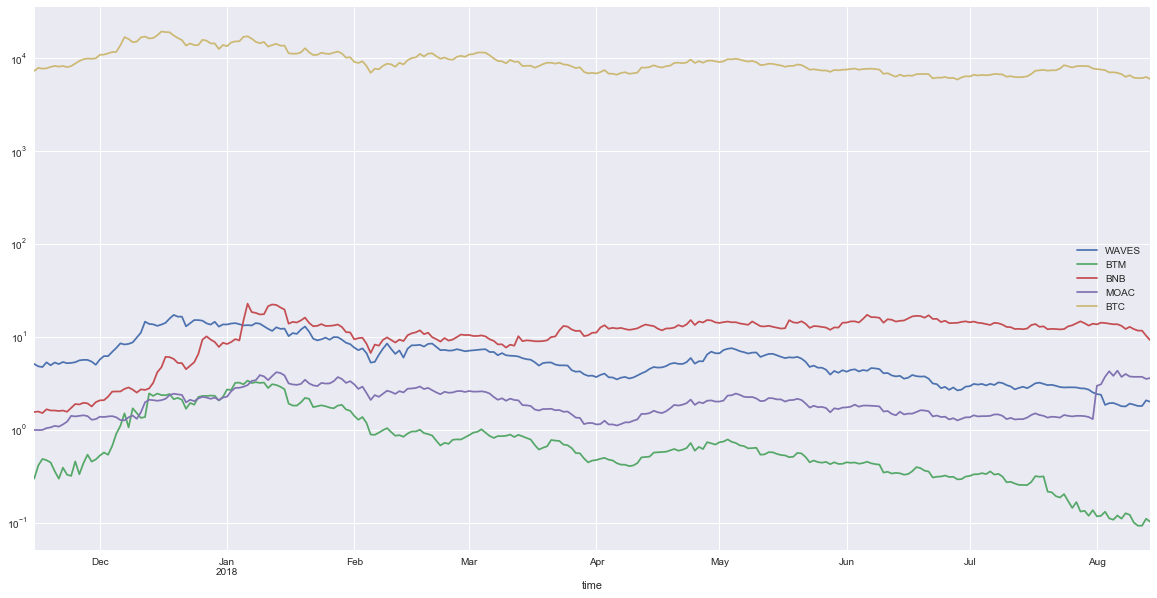

In [81]:
prices[['WAVES','BTM','BNB','MOAC','BTC']].dropna().plot(logy=True)

When looking at the plot these still look pretty correlated. We can see that MOAC spikes right before august which is probably why that didn't exhibit high correlation. BNB stays pretty steady and even lookes to be gaining through april and may even as btc falls. Its only now in the current altcoin downturn that we see BNB takign a nosedive. Waves and BTM seem to have been falling in accordance with bitcoin since the start of the year.


Lets look at the rest of the market to see how correlated things are:

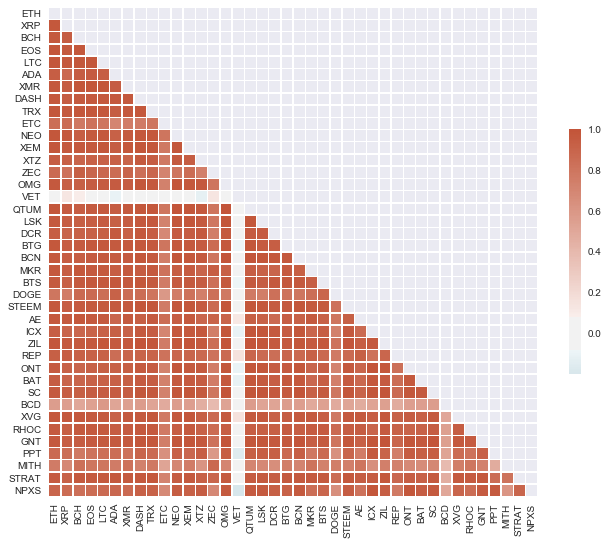

In [55]:
corr_plot(prices[[c for c in prices.columns if c not in reselient.index]].dropna(), annot=False)

As you would suspect everythings super correlated although VET and BCD stick out as the least correlated with rest of the altocoins. 

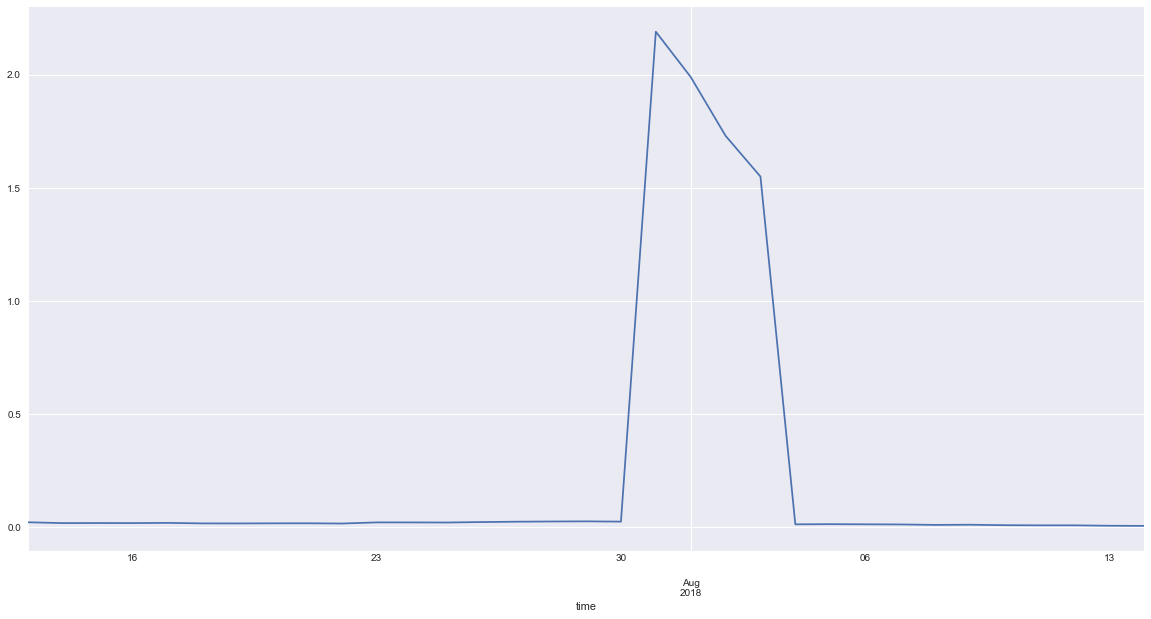

In [84]:
prices['VET'].dropna().plot()

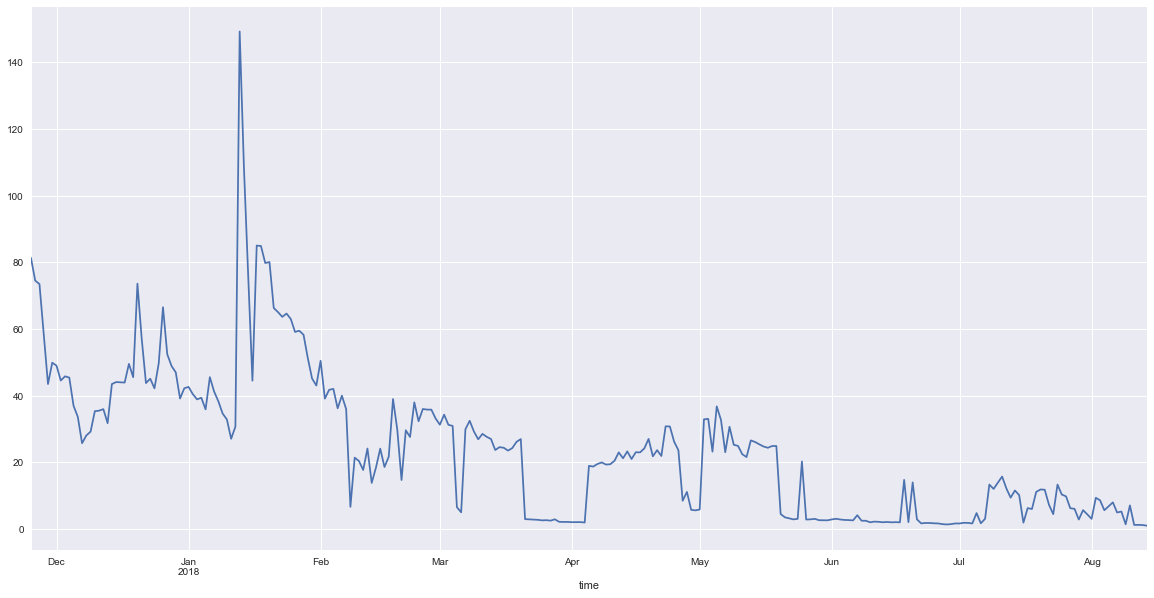

In [86]:
prices['BCD'].dropna().plot()

Seems like there lack of correlation is due to some missing or incorrect data.

Some questions to answer:
    - how many periods are there were bitcoin stays within a steady range or even increases in prices while altcoins fall
    - conversely are there periods when altcoins increase in price while bitcoin declines or moves sideways
    - what is the expected duration of these phenomena 
    - how 

Lets find a proxy for altcoin prices:

In [352]:
c = prices.corr().mean()
proxy = c[c.max()==c]
proxy
c[c>.7]

ETH     0.736131
ADA     0.733349
XEM     0.700695
DOGE    0.713771
ICX     0.702027
REP     0.736620
SC      0.721467
NPXS    0.704885
dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11f694e48>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11f650c88>], dtype=object)

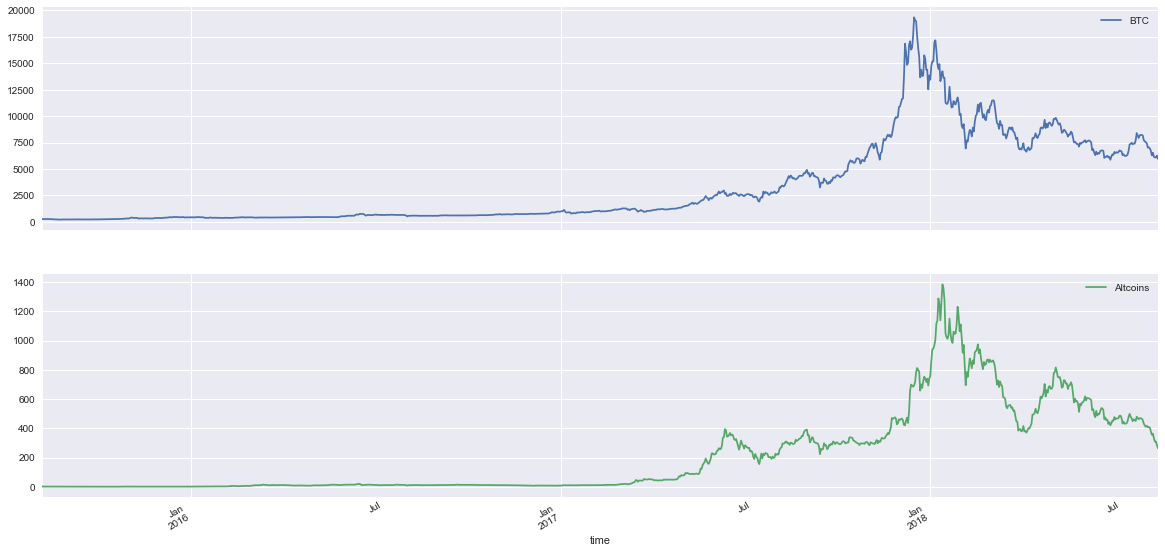

In [355]:
df = prices[['BTC','ETH']].dropna().rename(columns={'ETH': 'Altcoins'})
df.plot(subplots=True)

In [ ]:
Lets look at 1 week, 2 week and month long periods to how see how  

In [143]:
returns.min().min()

-0.59603081707167938

In [ ]:
returns = df.pct_change(days)

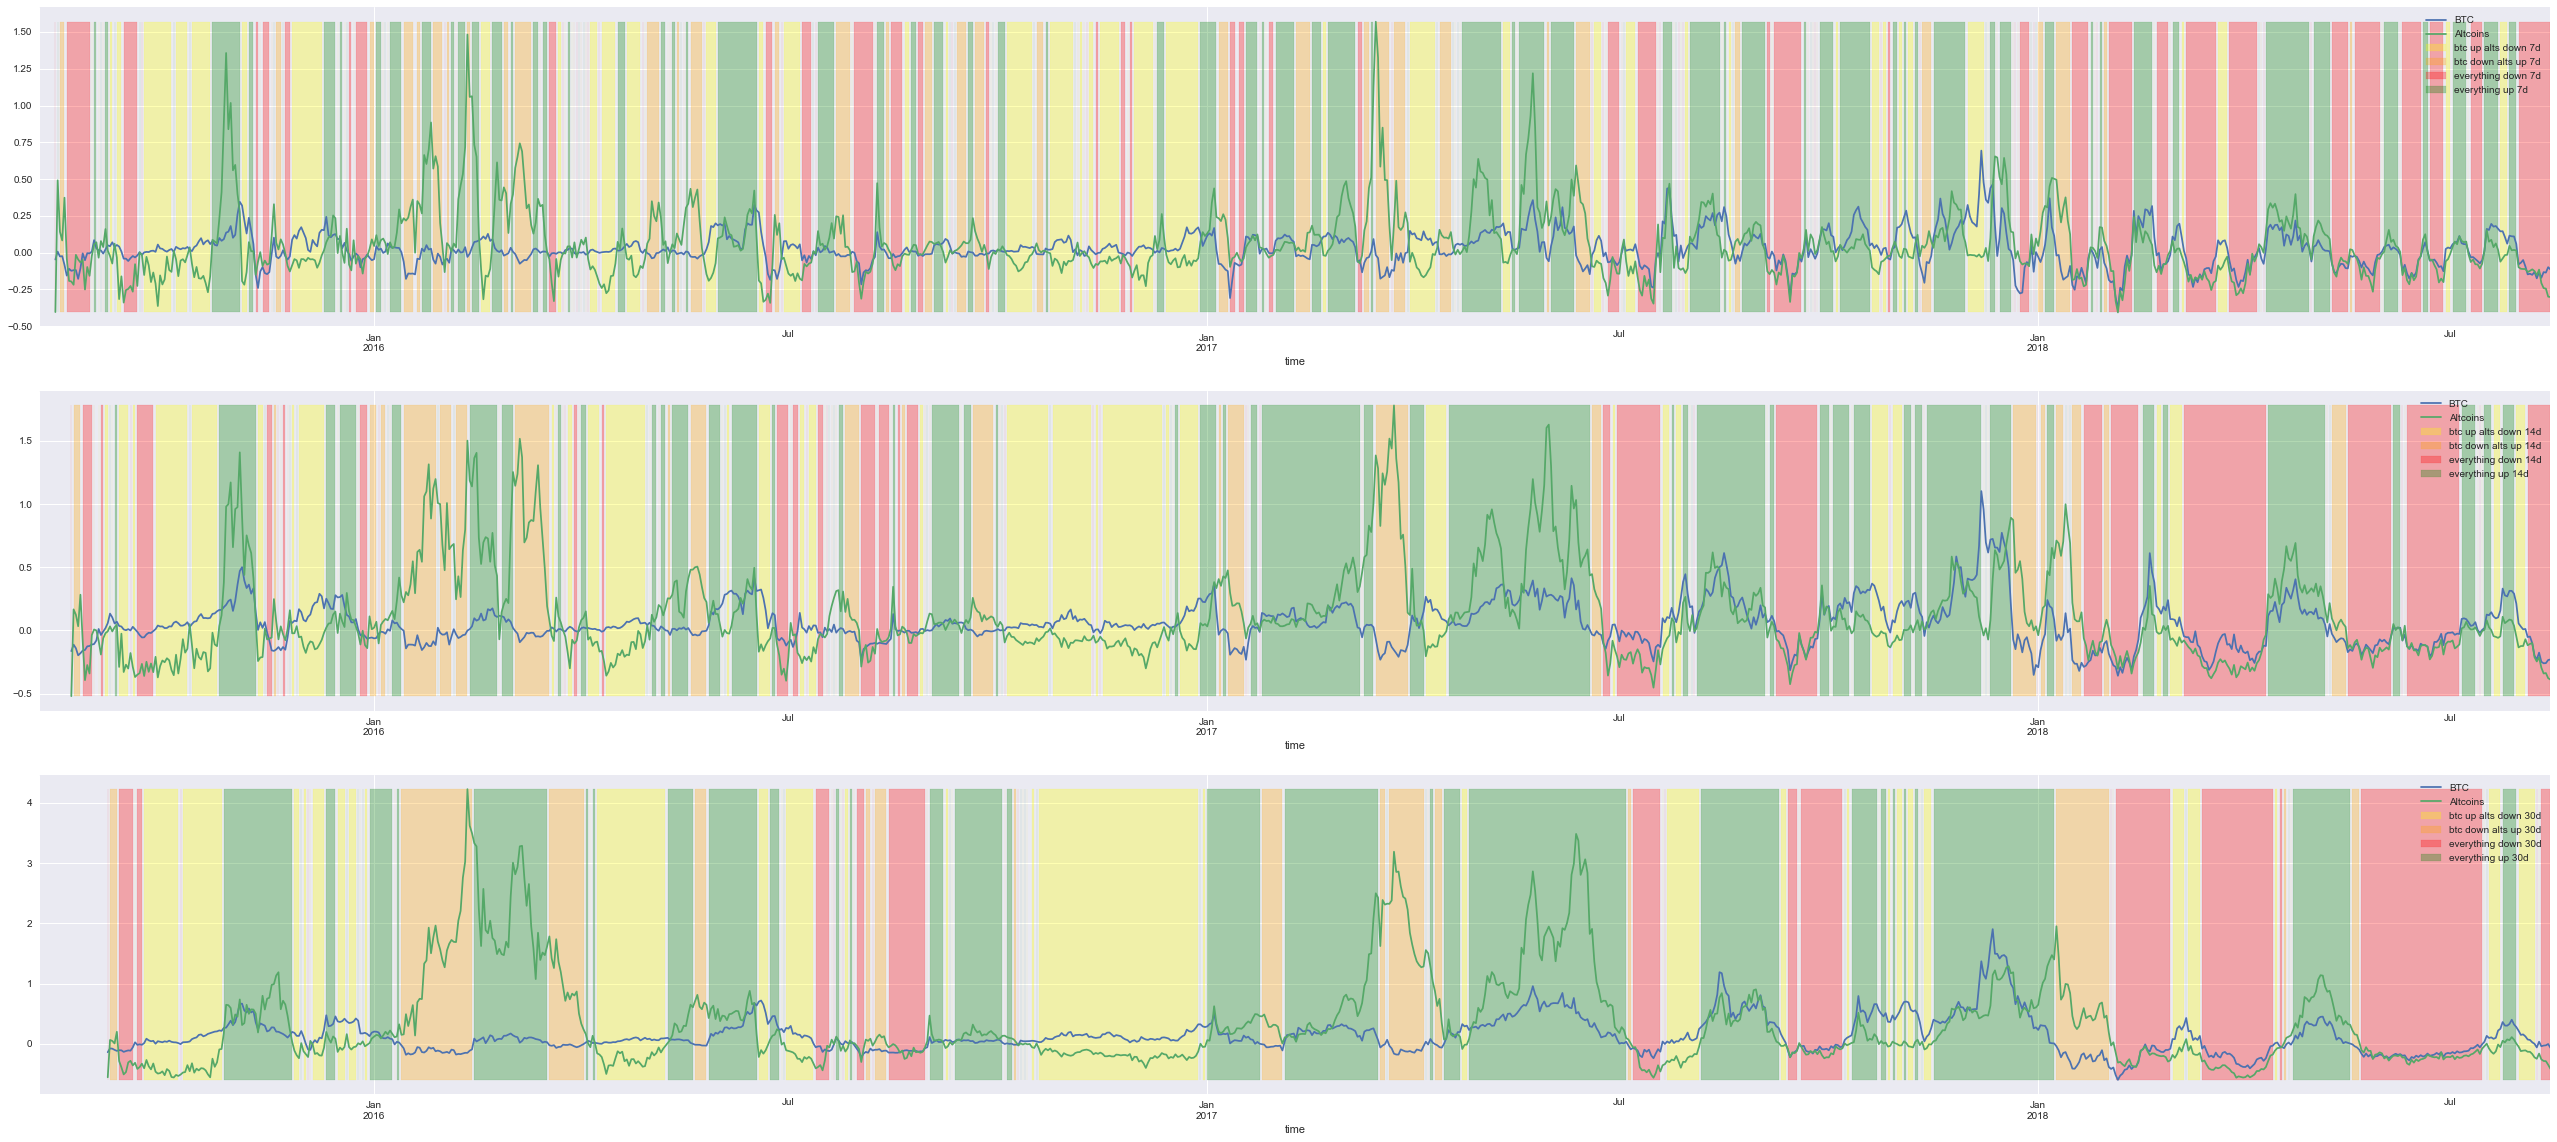

In [356]:
periods = [7, 14, 30]
ax_num = len(periods)
fig_h = ax_num * 15
fig_w = 20 
cmap = sns.diverging_palette(50, 10, sep=20 ,n=4)

fig, axes = plt.subplots(len(periods), figsize=(fig_h, fig_w))

for days, ax in zip(periods,axes.ravel()):
    returns = df[['BTC','Altcoins']].pct_change(days)
    returns.plot(ax=ax)
    df['returns_btc_{}d'.format(days)], df['returns_alts_{}d'.format(days)]= zip(*returns.values)
    df['btc_up_alts_down_{}d'.format(days)] = (returns.BTC>0)&(returns.Altcoins<0)
    df['btc_down_alts_up_{}d'.format(days)] = (returns.BTC<0)&(returns.Altcoins>0)
    df['everything_down_{}d'.format(days)] = (returns.BTC<0)&(returns.Altcoins<0)
    df['everything_up_{}d'.format(days)] = (returns.BTC>0)&(returns.Altcoins>0)
    
    scenarios = [c for c in df.columns if str(days) in c and 'return' not in c]
    colors = ['yellow','orange','red', 'green']
    for scenario, color in zip(scenarios, colors):
        ax.fill_between(returns.index, 
                         returns.min().min(), 
                         returns.max().max(), 
                         where=df[scenario],
                         alpha=0.3, color=color, label=scenario.replace('_',' '))
    
        ax.legend()
  
plt.show()

In [237]:
zip(*returns.values)

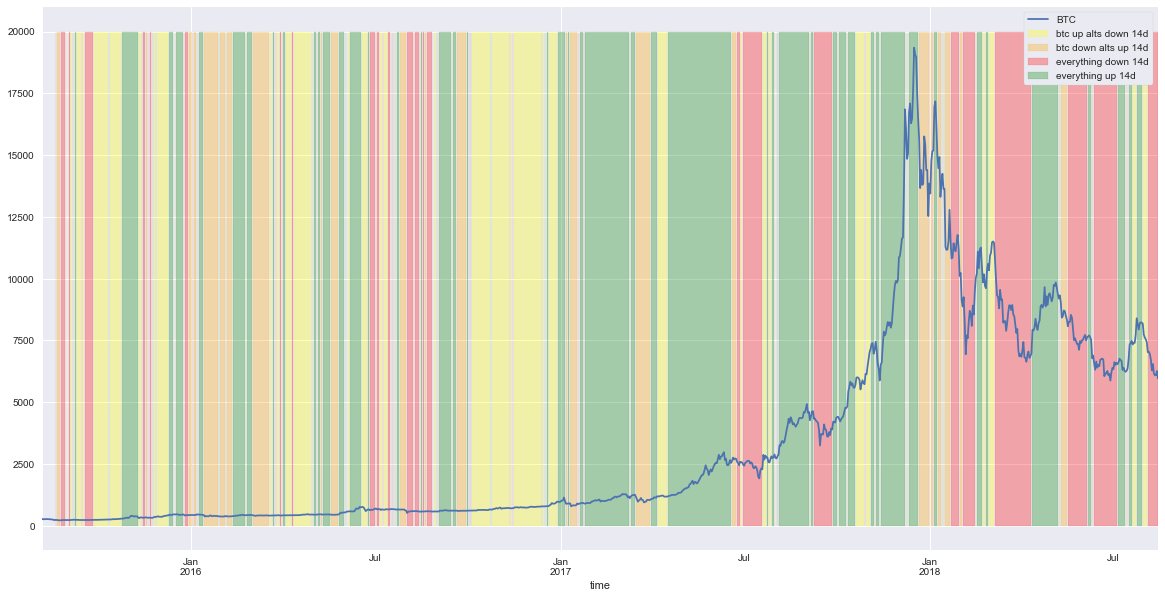

In [357]:
period = 14
scenarios = [c for c in df.columns if str(period) in c and 'return' not in c]

ax = df.BTC.plot()

colors = ['yellow','orange','red', 'green']

for scenario, color in zip(scenarios, colors):
    ax.fill_between(
        df.BTC.index, 0, 20e3, 
        where=df[scenario],
        alpha=0.3, color=color, label=scenario.replace('_',' ')
    )
    
plt.legend(fancybox=True, framealpha=1, frameon=True)


In [358]:
periods = [
    (df.index.min(), datetime(2018, 1, 1)),
    (datetime(2018, 1, 1), df.index.max())
]

for start, end in periods:
    print('From {} to {}'.format(start, end).upper())
    print('-'*50)
    for scenario in scenarios:
        section = df[start:end]
        scenario_name = scenario.replace('_',' ').upper()
        num_days = (section[scenario]*1).sum()
        num_instances = ((section[scenario]*1).diff()==1).sum()
        pct = round(num_days / section.shape[0], 2) * 100
        average_duration = section[(section[scenario]*1).diff()!=0].reset_index()[1:].time.diff(1)[1::2].mean()
        print(scenario_name)
        print('Number of days: {} ({}%)'.format(num_days, pct))
        print('Number of instances: {}'.format(num_instances))
        print('Average duration: {}'.format(average_duration))
    print('='*50)

FROM 2015-08-07 00:00:00 TO 2018-01-01 00:00:00
--------------------------------------------------
BTC UP ALTS DOWN 14D
Number of days: 225 (26.0%)
Number of instances: 46
Average duration: 4 days 21:23:28.695652
BTC DOWN ALTS UP 14D
Number of days: 145 (16.0%)
Number of instances: 37
Average duration: 3 days 22:03:14.594594
EVERYTHING DOWN 14D
Number of days: 118 (13.0%)
Number of instances: 33
Average duration: 3 days 15:45:00
EVERYTHING UP 14D
Number of days: 376 (43.0%)
Number of instances: 58
Average duration: 6 days 11:35:10.344827
FROM 2018-01-01 00:00:00 TO 2018-08-14 00:00:00
--------------------------------------------------
BTC UP ALTS DOWN 14D
Number of days: 21 (9.0%)
Number of instances: 7
Average duration: 3 days 00:00:00
BTC DOWN ALTS UP 14D
Number of days: 25 (11.0%)
Number of instances: 8
Average duration: 3 days 03:00:00
EVERYTHING DOWN 14D
Number of days: 117 (52.0%)
Number of instances: 8
Average duration: 13 days 15:00:00
EVERYTHING UP 14D
Number of days: 63 (28.0

In [345]:
8*14

112

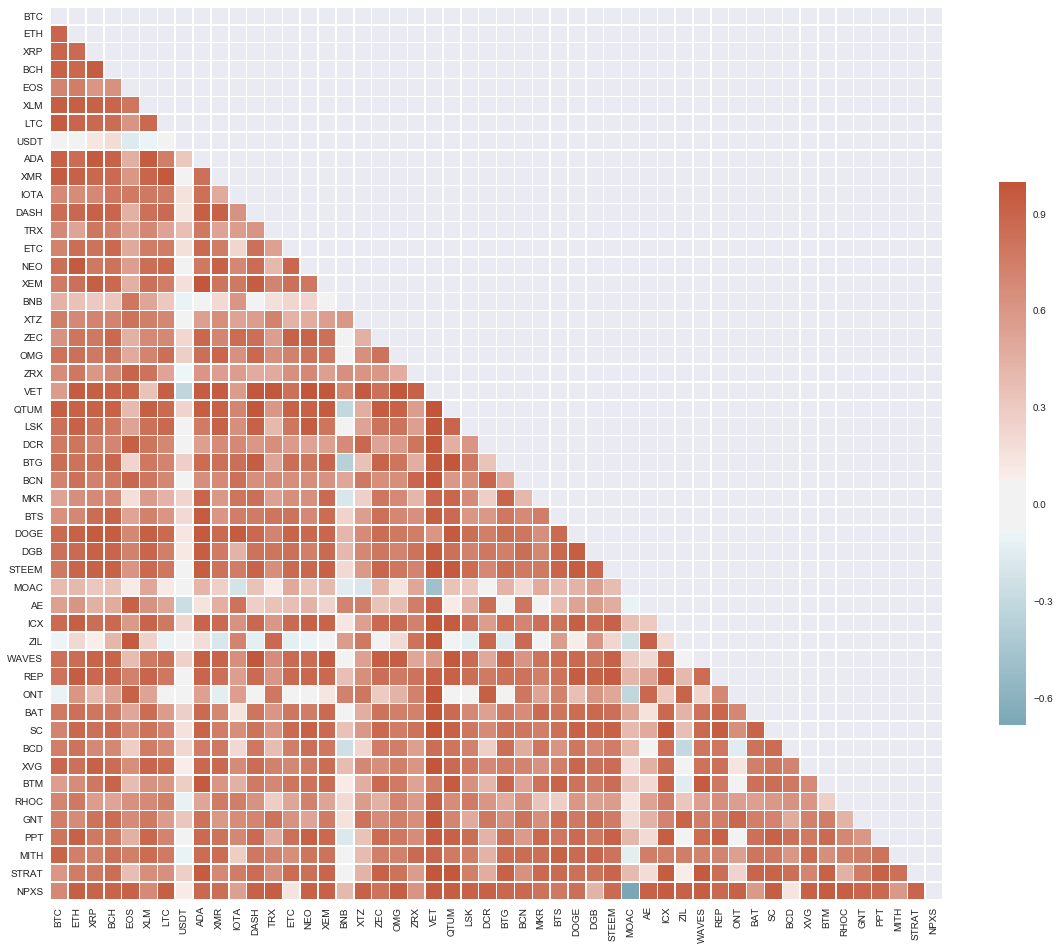

In [339]:
corr_plot(prices[df.index.min():][df.everything_down_14d], annot=False)

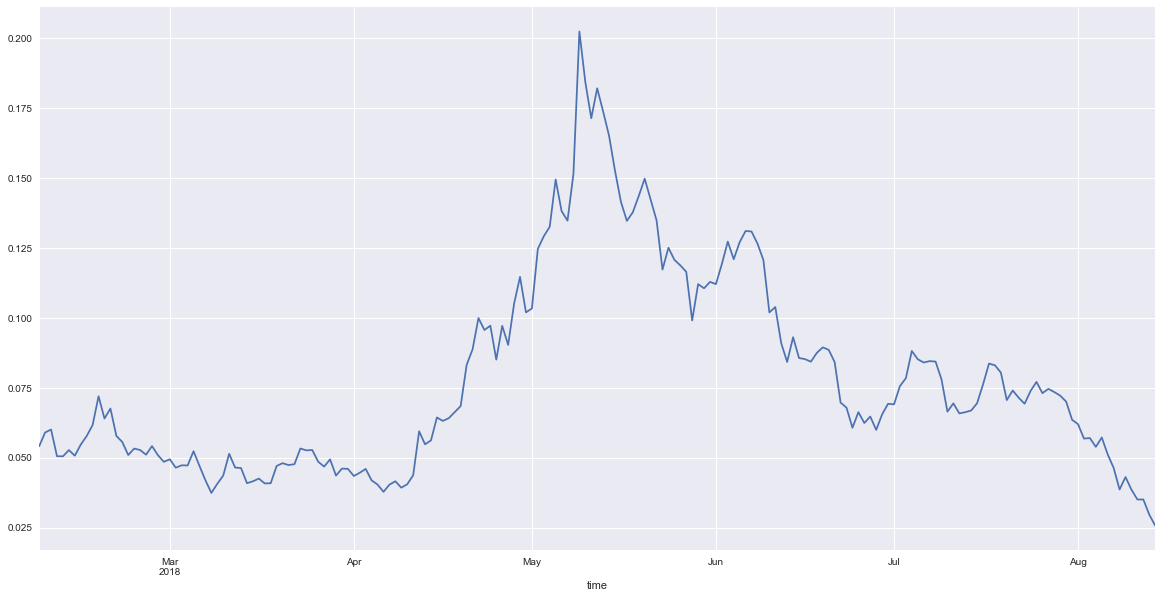

In [342]:
prices['ZIL'].dropna().plot()

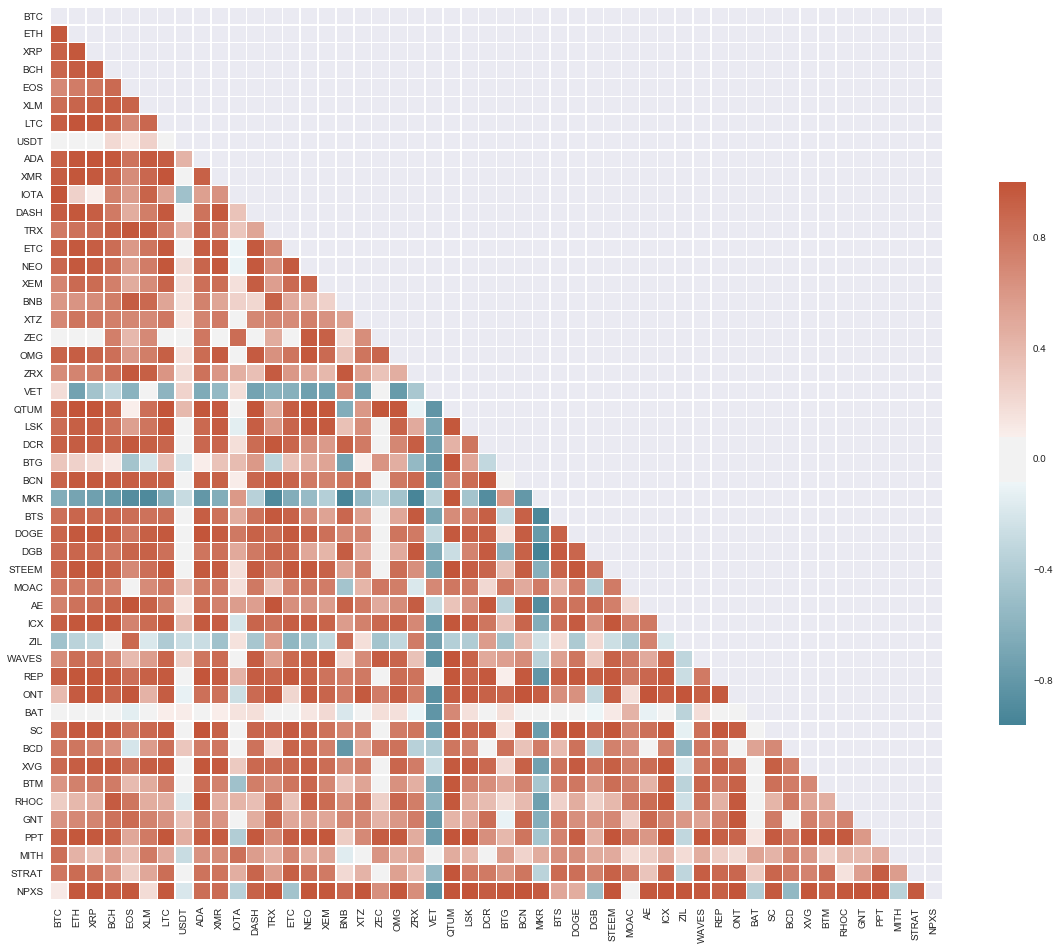

In [343]:
corr_plot(prices[df.index.min():][df.btc_up_alts_down_14d], annot=False)

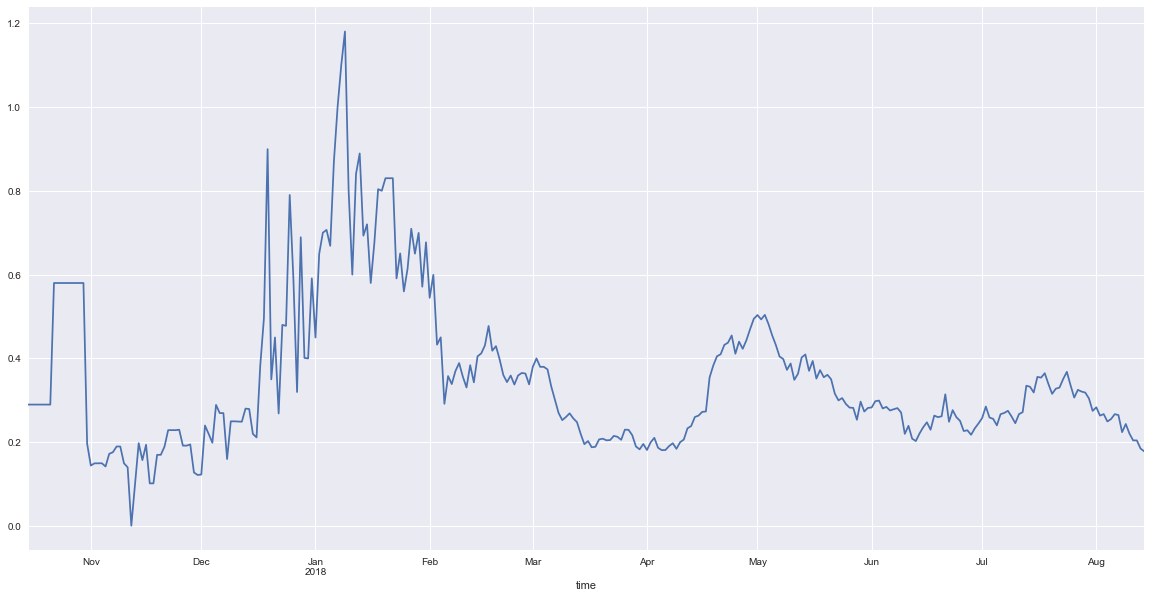

In [344]:
prices['BAT'].dropna().plot()

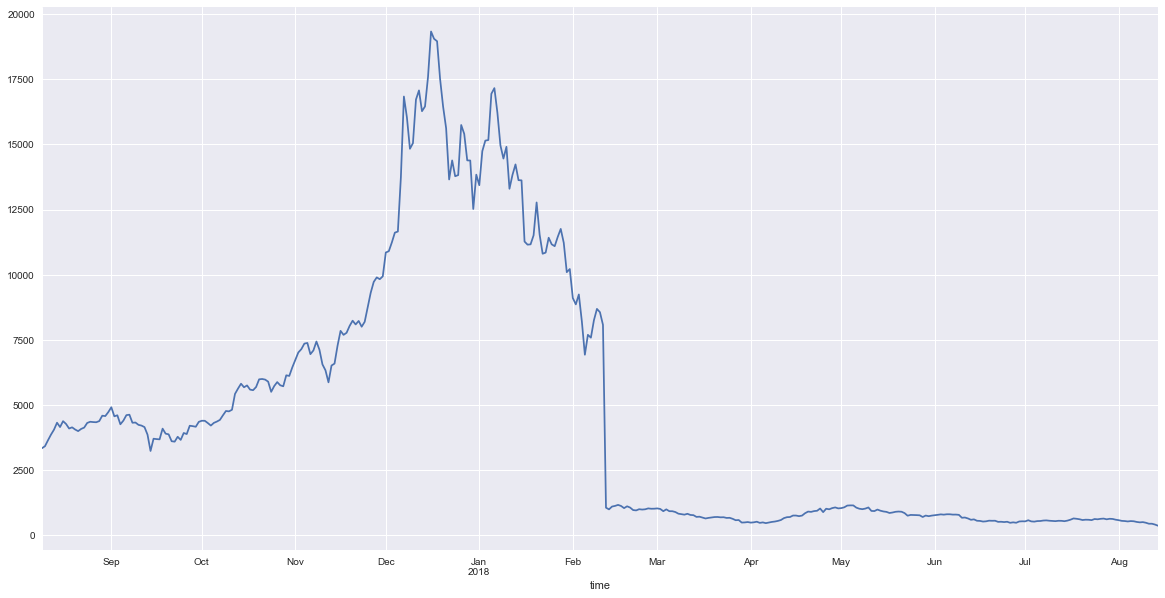

In [350]:
prices['MKR'].dropna().plot()

In [1]:
prices.columns

NameError: name 'prices' is not defined